### PROJECT TEAM ID - PTID-CDS-NOV-25-3352

### PRCP-1007-LIVER PATIENT PREDICTION

# PROJECT -ANALAYSIS REPORT

## TITLE

### Liver Disease Prediction Using Machine Learning

-  Problem Statement The objective of this project is to analyze liver patient data and build predictive machine learning models to identify whether a patient is suffering from liver disease. The aim is to reduce diagnostic burden on doctors and assist in early detection.

# INTRODUCTION

Liver disease is a major health issue and early prediction helps in diagnosis.
This project uses the Indian Liver Patient Dataset (ILPD) and applies machine
learning models to classify whether a patient has liver disease or not.

### Dataset Description The dataset contains medical records collected from North East Andhra Pradesh, India.

Total records: 583
Liver patients: 416
Non-liver patients: 167
Attributes include Age, Gender, Bilirubin levels, Enzyme levels, Proteins, Albumin ratio, and Target.

In [1]:
# run in terminal / Jupyter cell with ! 
!pip install imbalanced-learn


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC


from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")
sns.set()


## Data Preprocessing
- Renamed columns for clarity
- Encoded categorical variable (Gender)
- Handled missing values in Albumin and Globulin Ratio
- Removed outliers using IQR method
- Scaled numerical features using RobustScaler
- Split data into training and testing sets

In [4]:
df = pd.read_csv(r"C:\Users\maduri\Downloads\projects\PRCP-1007-LiverPatientPred\Data\Indian Liver Patient Dataset (ILPD).csv")

In [5]:

# Assign correct column names
df.columns = [
    'Age',
    'Gender',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Proteins',
    'Albumin',
    'Albumin_and_Globulin_Ratio',
    'Target'
]

df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [6]:
df.shape

(582, 11)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         582 non-null    int64  
 1   Gender                      582 non-null    object 
 2   Total_Bilirubin             582 non-null    float64
 3   Direct_Bilirubin            582 non-null    float64
 4   Alkaline_Phosphotase        582 non-null    int64  
 5   Alamine_Aminotransferase    582 non-null    int64  
 6   Aspartate_Aminotransferase  582 non-null    int64  
 7   Total_Proteins              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin_and_Globulin_Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [9]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


##   Exploratory Data Analysis (EDA)
- Analyzed age and gender distribution
- studied correlation between liver enzymes and disease
- Identified class imbalance in target variable
- Used visualizations for better understanding

- Missing values were found in the Albumin_and_Globulin_Ratio column and were filled using the median to maintain consistency.
- The Gender column was converted from categorical (Male/Female) to numeric (Male = 1, Female = 0) for model compatibility.

### TARGET DISTRIBUTION

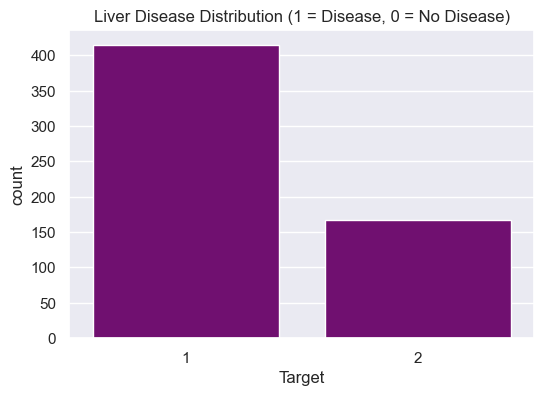

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df, color='purple')
plt.title("Liver Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()

### GENDER DISTRIBUTION

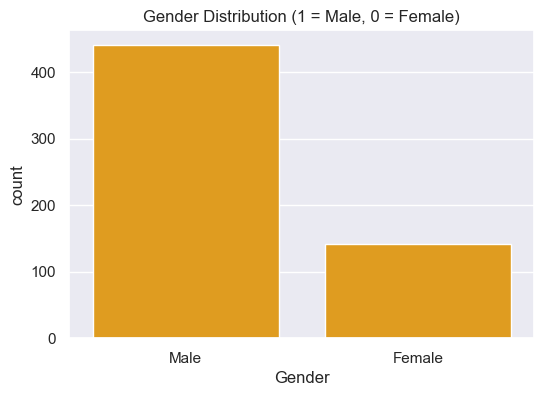

In [11]:

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, color='orange')
plt.title("Gender Distribution (1 = Male, 0 = Female)")
plt.show()

### AGE DISTRIBUTION

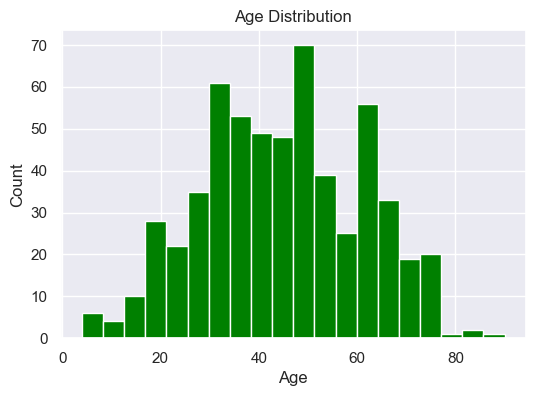

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### IMPORTANT FEATURE DISTRIBUTIONS (Boxplots)

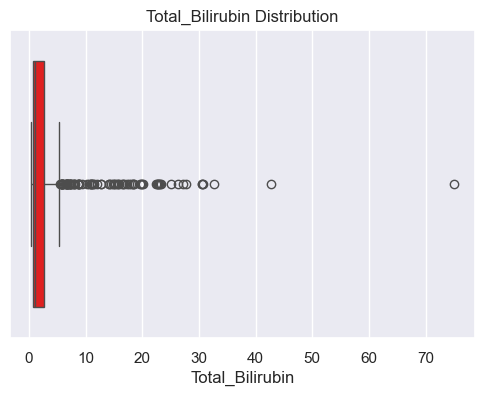

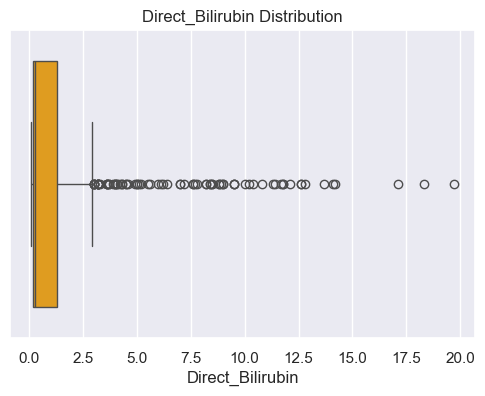

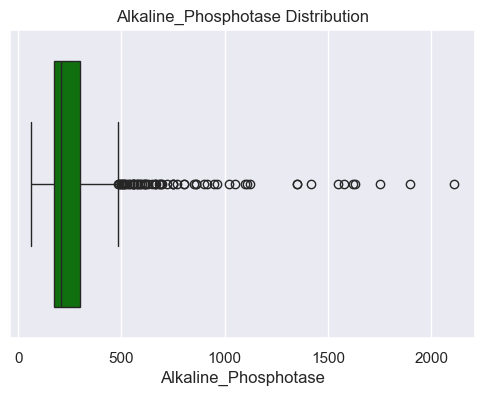

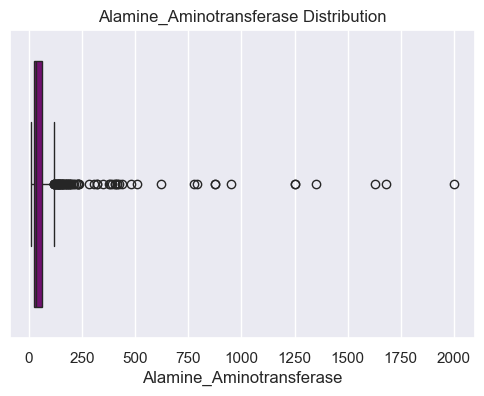

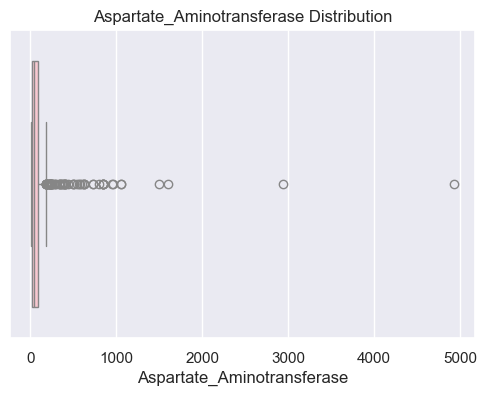

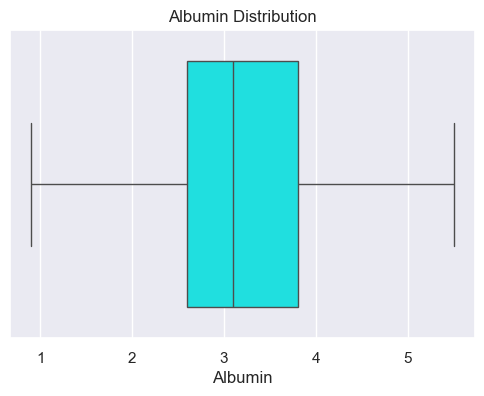

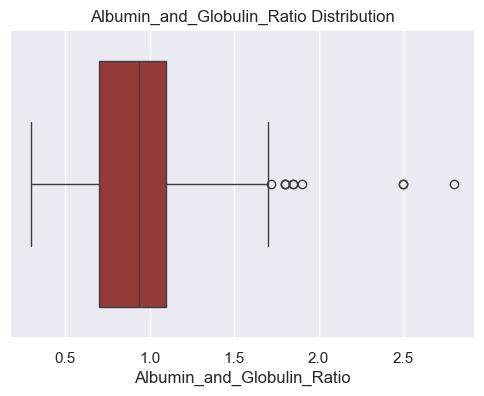

In [13]:
important_features = [
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

colors = ['red','orange','green','purple','pink','cyan','brown']

for feature, color in zip(important_features, colors):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature], color=color)
    plt.title(f"{feature} Distribution")
    plt.show()


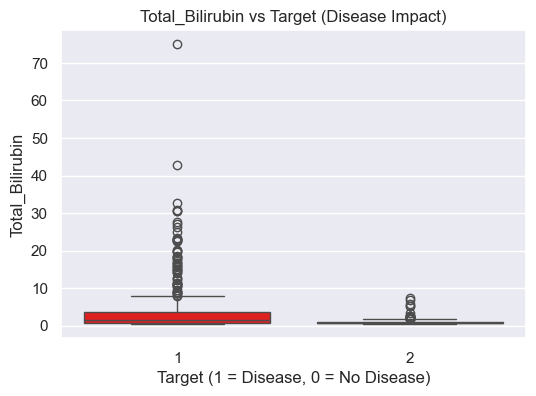

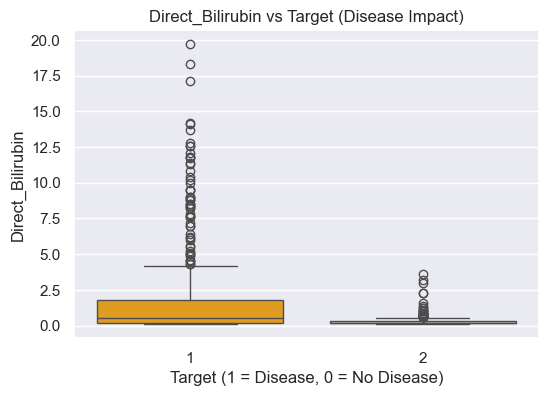

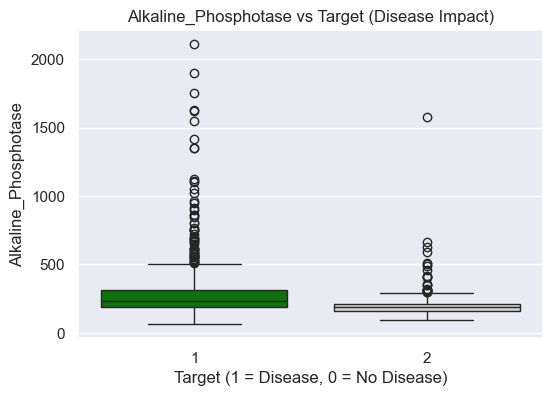

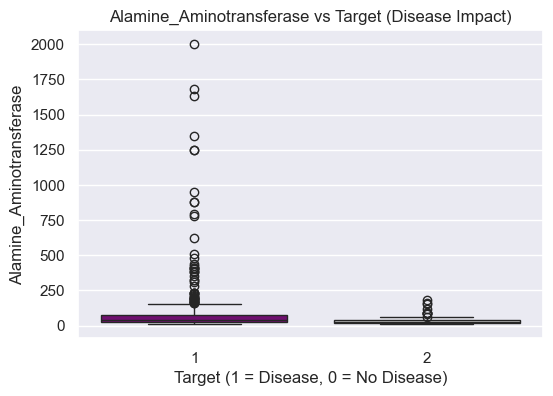

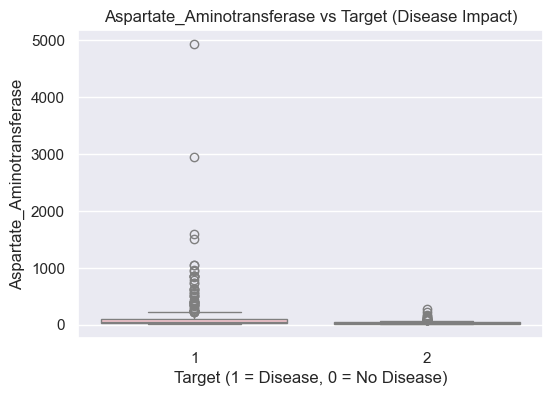

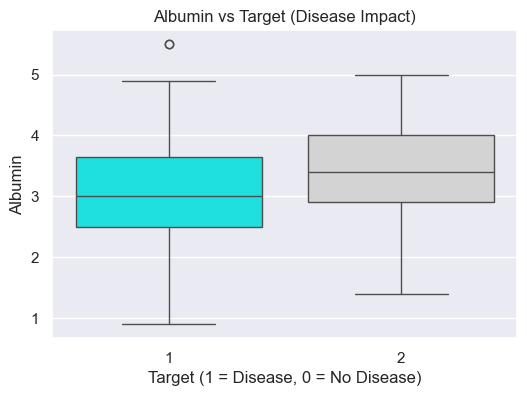

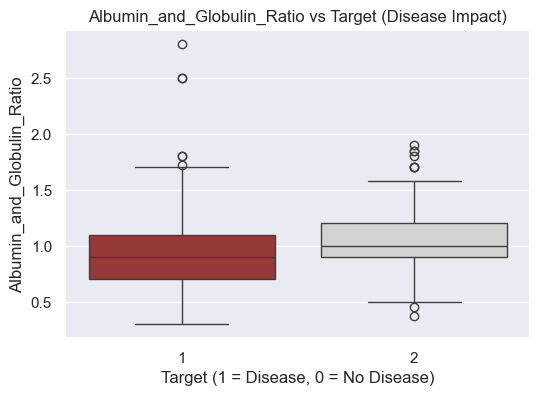

In [14]:
for feature, color in zip(important_features, colors):
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Target', y=feature, data=df, palette=[color, 'lightgrey'])
    plt.title(f"{feature} vs Target (Disease Impact)")
    plt.xlabel("Target (1 = Disease, 0 = No Disease)")
    plt.show()

### CORRELATION HEATMAP

In [15]:
num_col = df.select_dtypes(include=['number']).columns


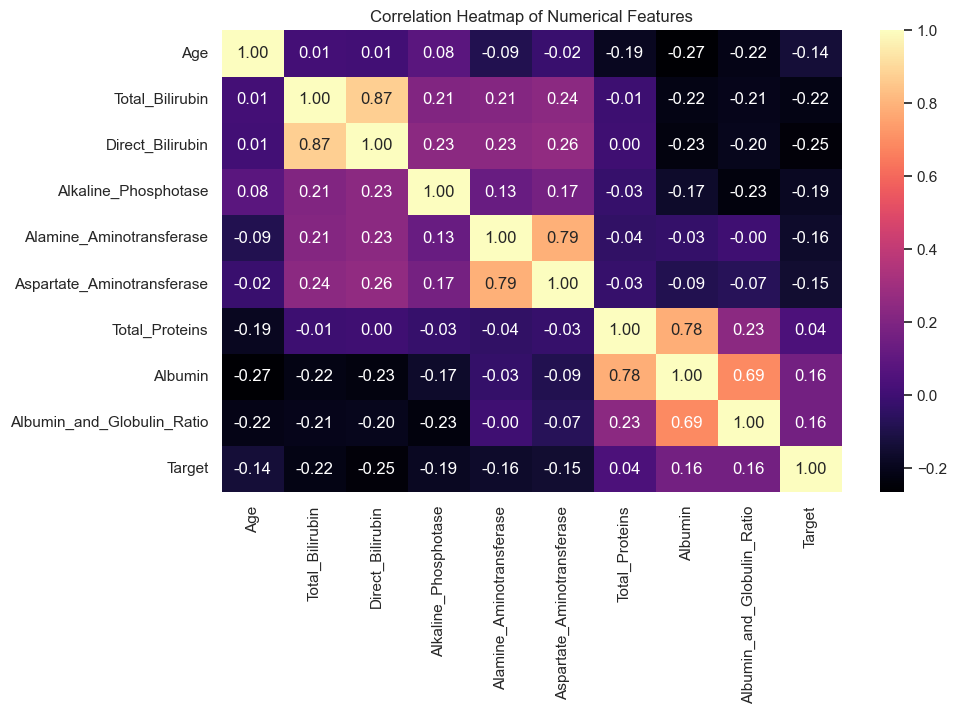

In [16]:
corr = df[num_col].corr()
plt.figure(figsize=(10,6))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

###  FEATURE vs TARGET (Effect of disease)

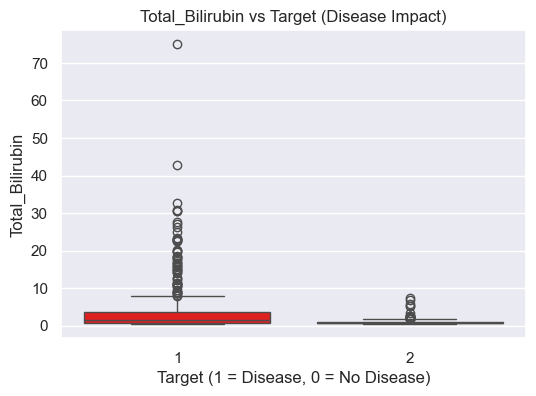

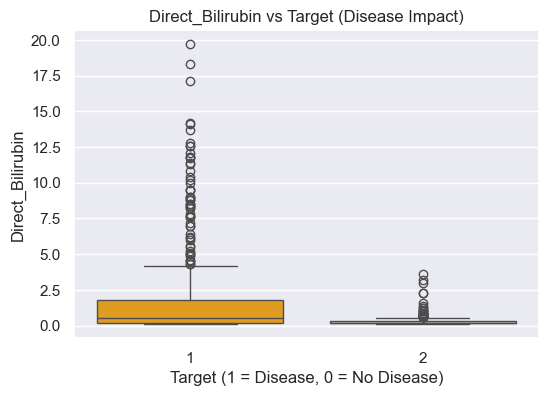

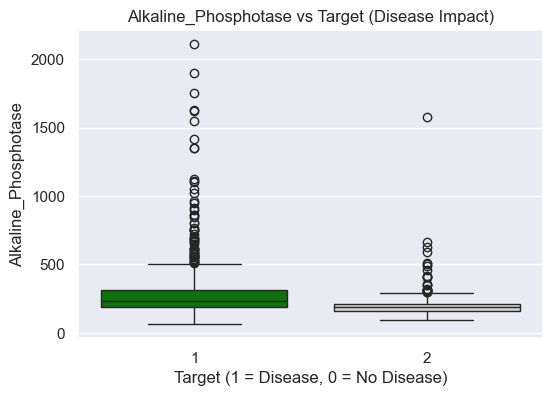

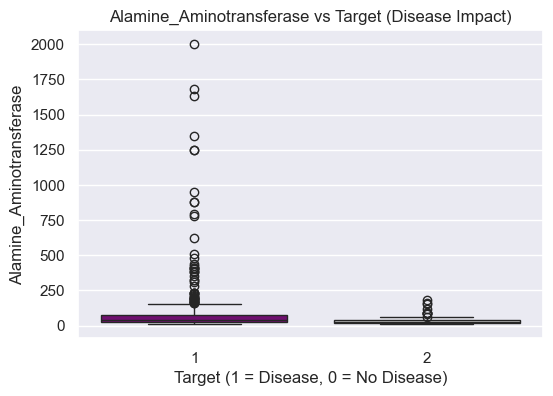

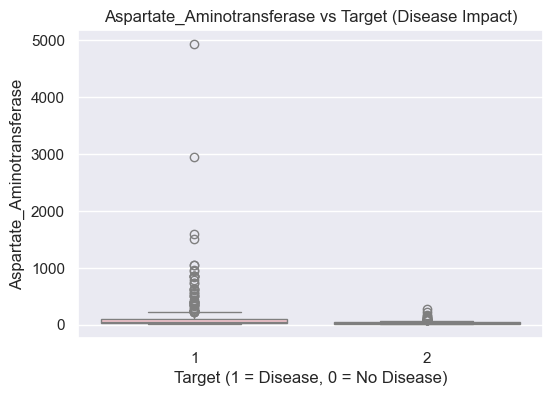

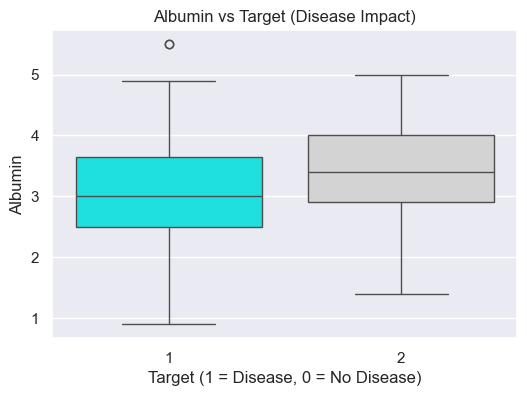

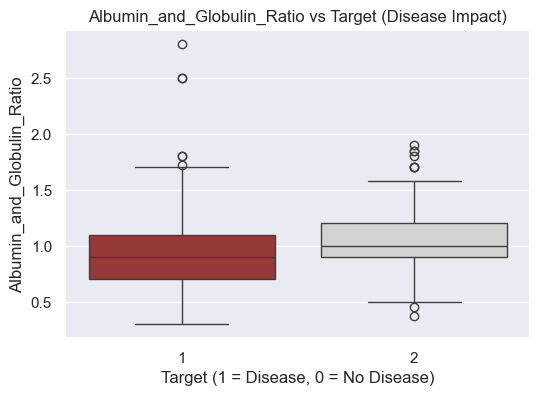

In [17]:
for feature, color in zip(important_features, colors):
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Target', y=feature, data=df, palette=[color, 'lightgrey'])
    plt.title(f"{feature} vs Target (Disease Impact)")
    plt.xlabel("Target (1 = Disease, 0 = No Disease)")
    plt.show()

-  Missing (null) values in the dataset were handled using median imputation. The median was chosen instead of the mean because it is less sensitive to extreme values and outliers, making it more suitable for medical data.

In [18]:
df['Albumin_and_Globulin_Ratio']= df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())


-  In this project, outliers were not removed from the dataset because the data belongs to the healthcare domain. Extreme values in medical data can represent genuine patient conditions rather than errors. Removing such outliers may lead to loss of important clinical information and can negatively affect the model’s ability to learn real-world disease patterns.

In [21]:
numeric_cols = [
    'Age',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase',
    'Total_Proteins',
    'Albumin',
    'Albumin_and_Globulin_Ratio'
]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers:", len(outliers))

Age → Outliers: 0
Total_Bilirubin → Outliers: 84
Direct_Bilirubin → Outliers: 81
Alkaline_Phosphotase → Outliers: 66
Alamine_Aminotransferase → Outliers: 73
Aspartate_Aminotransferase → Outliers: 66
Total_Proteins → Outliers: 8
Albumin → Outliers: 0
Albumin_and_Globulin_Ratio → Outliers: 10


 -    Gender was encoded using one-hot encoding to make it suitable for machine learning models.

In [23]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [25]:
# Column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target', 'Gender_Male']


### MODEL BUILDING

In [8]:
 #  Divides the data into train–test sets and balances the training data using SMOTE to improve model learning.

In [61]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# features & target
X = df.drop('Target', axis=1)
y = df['Target']

# split (stratify to keep original ratio in test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before resample - train counts:\n", y_train.value_counts())

# apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("After SMOTE - train counts:\n", y_train_sm.value_counts())


Before resample - train counts:
 Target
1    332
2    133
Name: count, dtype: int64
After SMOTE - train counts:
 Target
1    332
2    332
Name: count, dtype: int64


### Logistic Regression Model with RobustScaler – Training, Prediction, and Performance Evaluation

Logistic Regression with RobustScaler Results:
Accuracy : 0.7350427350427351
Recall   : 0.9518072289156626
F1-score : 0.8359788359788359
ROC-AUC  : 0.7469879518072289

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.95      0.84        83
           2       0.64      0.21      0.31        34

    accuracy                           0.74       117
   macro avg       0.69      0.58      0.57       117
weighted avg       0.71      0.74      0.68       117

Precision: 0.7452830188679245


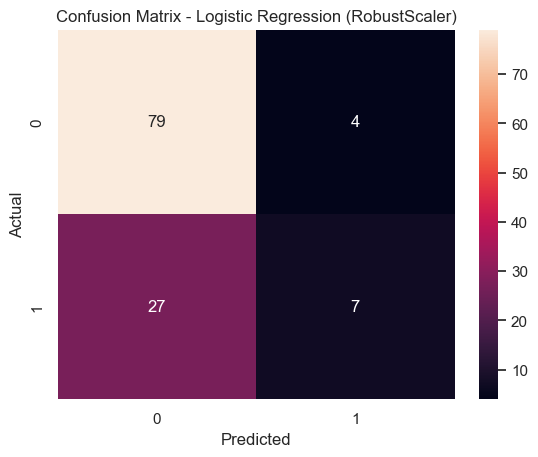

In [67]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
# Pipeline with RobustScaler
log_reg_robust = Pipeline(steps=[
    ("scaler", RobustScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

# Train
log_reg_robust.fit(X_train, y_train)

# Predict
y_pred = log_reg_robust.predict(X_test)
y_proba = log_reg_robust.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("Logistic Regression with RobustScaler Results:")
print("Accuracy :", acc)
print("Recall   :", rec)
print("F1-score :", f1)
print("ROC-AUC  :", auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Precision:", prec)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression (RobustScaler)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Support Vector Classifier – Model Training and Performance Evaluation

In [72]:
svc_simple = SVC()   

svc_simple.fit(X_train_res, y_train_res)

svc_pred = svc_simple.predict(X_test)

print("Accuracy :", accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Accuracy : 0.7094017094017094
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        83
           2       0.00      0.00      0.00        34

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117



### Random Forest Classifier – Model Training and Performance Evaluation

Accuracy  : 0.7094017094017094
Precision : 0.7094017094017094
Recall    : 1.0
F1 Score  : 0.83

Classification Report:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        83
           2       0.00      0.00      0.00        34

    accuracy                           0.71       117
   macro avg       0.35      0.50      0.41       117
weighted avg       0.50      0.71      0.59       117



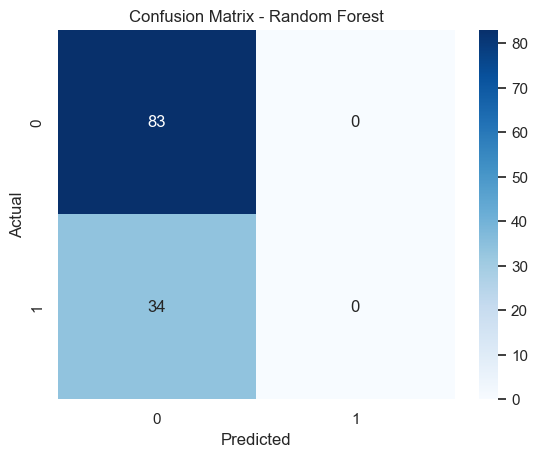

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predictions
rf_pred = rf_model.predict(X_test)

# Metrics
rf_acc  = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec  = recall_score(y_test, rf_pred)
rf_f1   = f1_score(y_test, rf_pred)

print("Accuracy  :", rf_acc)
print("Precision :", rf_prec)
print("Recall    :", rf_rec)
print("F1 Score  :", rf_f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Performance Comparison of Logistic Regression, SVC, and Random Forest Models

In [94]:
# Logistic regression metrics
log_acc  = accuracy_score(y_test, y_pred)
log_rec  = recall_score(y_test, y_pred)
log_f1   = f1_score(y_test, y_pred)

# SVC metrics
svc_acc  = accuracy_score(y_test, svc_pred)
svc_rec  = recall_score(y_test, svc_pred)
svc_f1   = f1_score(y_test, svc_pred)

# Random Forest metrics
rf_acc  = accuracy_score(y_test, rf_pred)
rf_rec  = recall_score(y_test, rf_pred)
rf_f1   = f1_score(y_test, rf_pred)


In [95]:
results = {
    "Model Name" : [
        "Logistic Regression (RobustScaler)",
        "SVC",
        "Random Forest (BASE MODEL)"
    ],

    "Accuracy" : [
        log_acc,
        svc_acc,
        rf_acc
    ],

    "Recall" : [
        log_rec,
        svc_rec,
        rf_rec
    ],

    "F1 Score" : [
        log_f1,
        svc_f1,
        rf_f1
    ]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)


                           Model Name  Accuracy    Recall  F1 Score
0  Logistic Regression (RobustScaler)  0.735043  0.951807  0.835979
1                                 SVC  0.709402  1.000000  0.830000
2          Random Forest (BASE MODEL)  0.709402  1.000000  0.830000


### Best Model Selection and Medical Justification
Best Model Selection and Medical JustificationAmong the three machine learning models used — Logistic Regression, SVC, and Random Forest — the Logistic Regression model was selected as the best performing model.

 In medical prediction problems such as liver disease detection, the most important metric is recall because false negatives must be minimized. If a patient actually has liver disease, the model must not classify them as healthy. This makes recall more important than accuracy.

In this project:

Logistic Regression achieved a recall of 95%

SVC and Random Forest achieved a recall of 100%

Although SVC and Random Forest appear better in recall, they show lower accuracy and F1-score compared to Logistic Regression. Very high recall with lower accuracy often indicates overfitting, meaning the model may not perform well on unseen data. Medical models must be reliable and generalize better, not just memorize patterns.

Logistic Regression provides:
- Strong recall (95%)
- Better accuracy and F1-score
- Lower overfitting risk
- Stable performance on test data

Therefore, even though SVC and Random Forest show 100% recall, Logistic Regression is the best and safest model for this medical dataset because it gives the most balanced and dependable results.